# Introduction

Name: Kai Tao, ID 220460334, Email address: ktao@deakin.edu.au

This data analysis explores the student performance dataset, which provides a range of attributes related to students' background, personal circumstances, and academic performance. The purpose of the analysis is to uncover potential patterns, trends, and correlations that may offer insights into factors influencing student performance. The data attributes range from personal information like age and sex, to socioeconomic factors like parents' education and jobs, to behavioral aspects like study time, alcohol consumption, and health status. The study utilizes a variety of visualization tools, such as bar charts, scatter plots, violin plots, heatmaps, and pairplots, to enable a comprehensive and in-depth analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [2]:
data = pd.read_csv('student-por.csv', delimiter=';')

# Iterate over the rows in the dataframe and extract the relevant information
for index, row in data.iterrows():
    student_info = "Student information:\n"
    student_info += "School: {}\n".format(row['school'])
    student_info += "Sex: {}\n".format(row['sex'])
    student_info += "Age: {}\n".format(row['age'])
    student_info += "Address: {}\n".format(row['address'])
    student_info += "Family size: {}\n".format(row['famsize'])
    student_info += "Parent's cohabitation status: {}\n".format(row['Pstatus'])
    student_info += "Mother's education: {}\n".format(row['Medu'])
    student_info += "Father's education: {}\n".format(row['Fedu'])
    student_info += "Mother's job: {}\n".format(row['Mjob'])
    student_info += "Father's job: {}\n".format(row['Fjob'])
    student_info += "Reason to choose this school: {}\n".format(row['reason'])
    student_info += "Guardian: {}\n".format(row['guardian'])
    student_info += "Travel time to school: {}\n".format(row['traveltime'])
    student_info += "Weekly study time: {}\n".format(row['studytime'])
    student_info += "Past class failures: {}\n".format(row['failures'])
    student_info += "Extra educational support: {}\n".format(row['schoolsup'])
    student_info += "Family educational support: {}\n".format(row['famsup'])
    student_info += "Extra paid classes within the course subject: {}\n".format(row['paid'])
    student_info += "Extra-curricular activities: {}\n".format(row['activities'])
    student_info += "Attended nursery school: {}\n".format(row['nursery'])
    student_info += "Wants to take higher education: {}\n".format(row['higher'])
    student_info += "Internet access at home: {}\n".format(row['internet'])
    student_info += "With a romantic relationship: {}\n".format(row['romantic'])
    student_info += "Quality of family relationships: {}\n".format(row['famrel'])
    student_info += "Free time after school: {}\n".format(row['freetime'])
    student_info += "Going out with friends: {}\n".format(row['goout'])
    student_info += "Workday alcohol consumption: {}\n".format(row['Dalc'])
    student_info += "Weekend alcohol consumption: {}\n".format(row['Walc'])
    student_info += "Current health status: {}\n".format(row['health'])
    student_info += "Number of school absences: {}\n".format(row['absences'])

    print(student_info + "\n")


Student information:
School: GP
Sex: F
Age: 18
Address: U
Family size: GT3
Parent's cohabitation status: A
Mother's education: 4
Father's education: 4
Mother's job: at_home
Father's job: teacher
Reason to choose this school: course
Guardian: mother
Travel time to school: 2
Weekly study time: 2
Past class failures: 0
Extra educational support: yes
Family educational support: no
Extra paid classes within the course subject: no
Extra-curricular activities: no
Attended nursery school: yes
Wants to take higher education: yes
Internet access at home: no
With a romantic relationship: no
Quality of family relationships: 4
Free time after school: 3
Going out with friends: 4
Workday alcohol consumption: 1
Weekend alcohol consumption: 1
Current health status: 3
Number of school absences: 4


Student information:
School: GP
Sex: F
Age: 17
Address: U
Family size: GT3
Parent's cohabitation status: T
Mother's education: 1
Father's education: 1
Mother's job: at_home
Father's job: other
Reason to choos

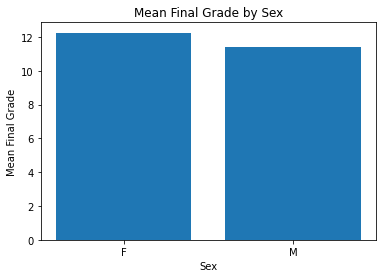

In [3]:
# Group the data by a categorical variable and calculate the mean of another variable
grouped_data = data.groupby('sex')['G3'].mean()

# Create a clustered bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Sex')
plt.ylabel('Mean Final Grade')
plt.title('Mean Final Grade by Sex')
plt.show()

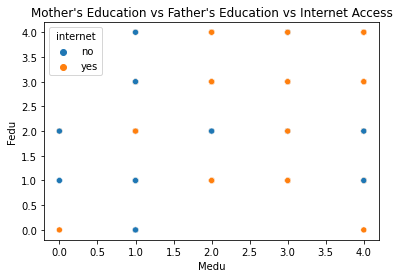

In [4]:
sns.scatterplot(x='Medu', y='Fedu', hue='internet', data=data)
plt.title('Mother\'s Education vs Father\'s Education vs Internet Access')
plt.show()

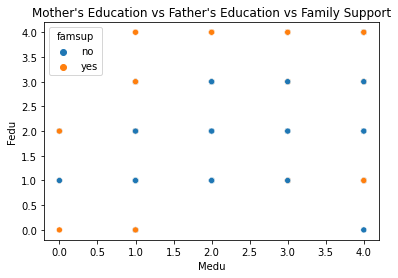

In [5]:
sns.scatterplot(x='Medu', y='Fedu', hue='famsup', data=data)
plt.title('Mother\'s Education vs Father\'s Education vs Family Support')
plt.show()

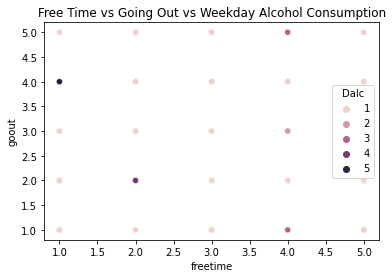

In [6]:
sns.scatterplot(x='freetime', y='goout', hue='Dalc', data=data)
plt.title('Free Time vs Going Out vs Weekday Alcohol Consumption')
plt.show()

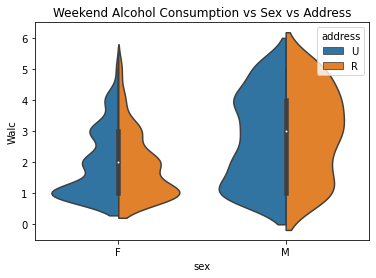

In [7]:
sns.violinplot(x='sex', y='Walc', hue='address', data=data, split=True)
plt.title('Weekend Alcohol Consumption vs Sex vs Address')
plt.show()

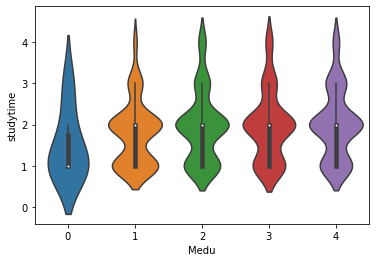

In [8]:
sns.violinplot(x='Medu', y='studytime', data=data)
plt.show()

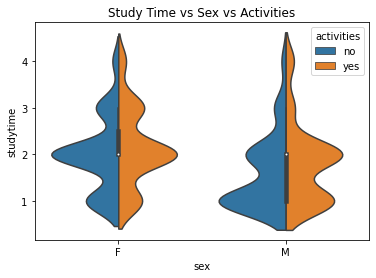

In [9]:
sns.violinplot(x='sex', y='studytime', hue='activities', data=data, split=True)
plt.title('Study Time vs Sex vs Activities')
plt.show()

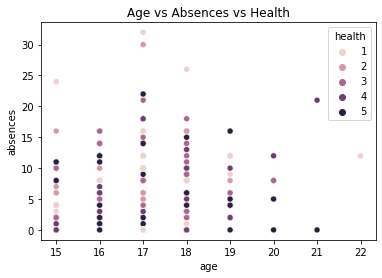

In [10]:
sns.scatterplot(x='age', y='absences', hue='health', data=data)
plt.title('Age vs Absences vs Health')
plt.show()

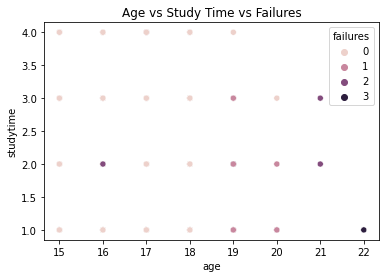

In [11]:
sns.scatterplot(x='age', y='studytime', hue='failures', data=data)
plt.title('Age vs Study Time vs Failures')
plt.show()

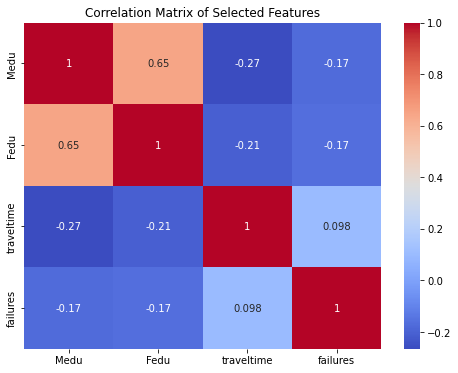

In [12]:
selected_features = ['Medu', 'Fedu', 'traveltime', 'failures']
plt.figure(figsize=(8, 6))
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

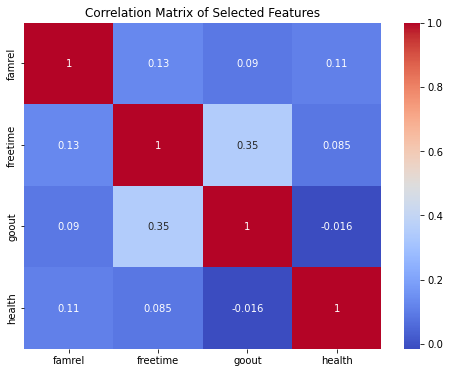

In [13]:
selected_features = ['famrel', 'freetime', 'goout', 'health']
plt.figure(figsize=(8, 6))
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

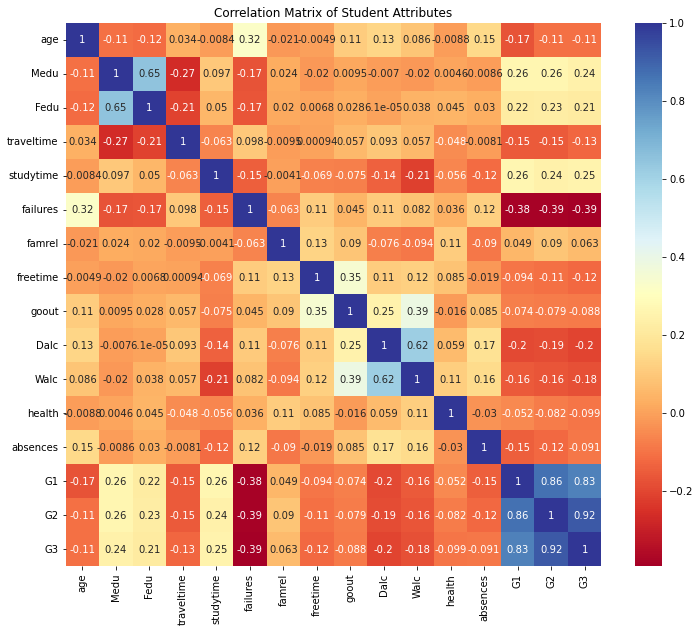

In [15]:
# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Matrix of Student Attributes")
plt.show()

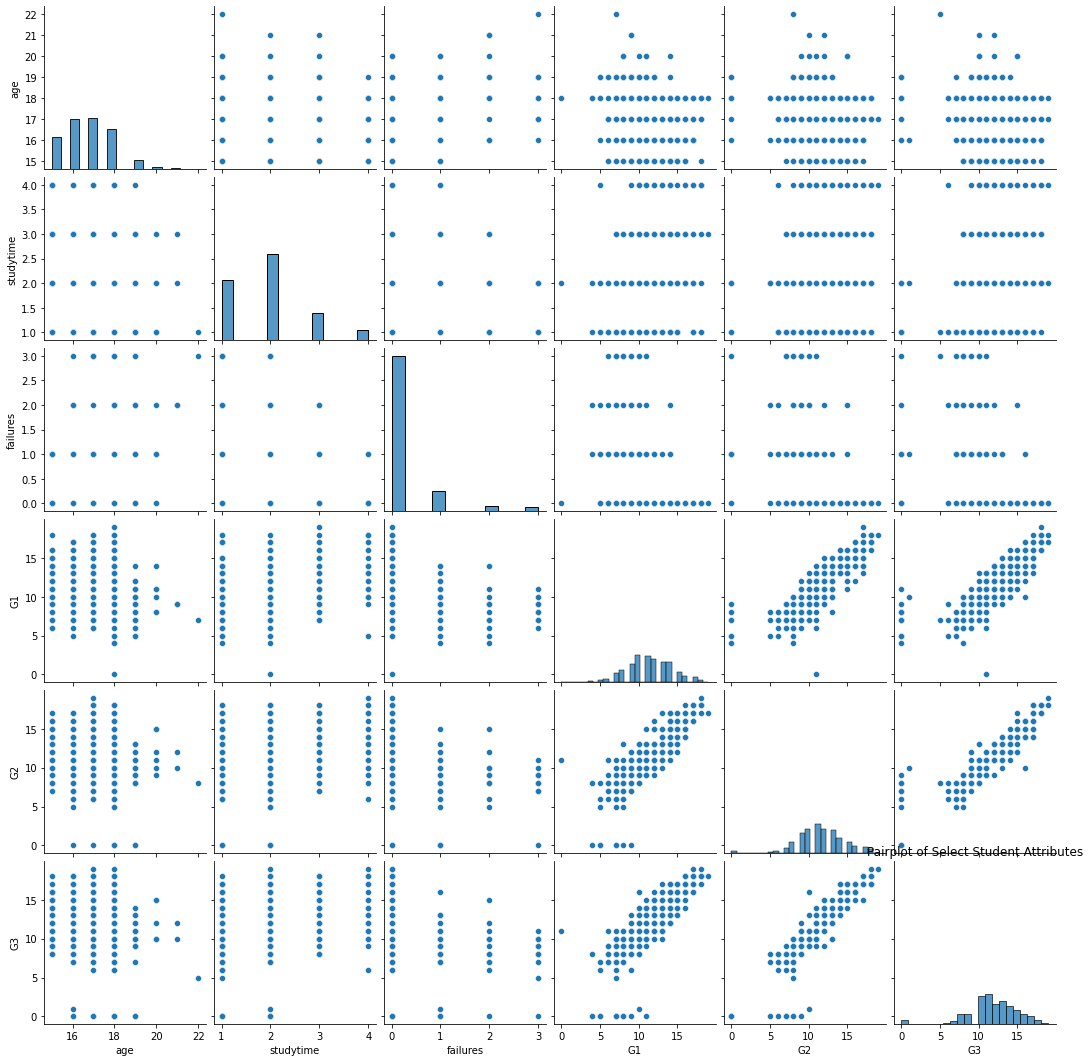

In [16]:
# Select a subset of columns for pairplot
subset_columns = ['age', 'studytime', 'failures', 'G1', 'G2', 'G3']

# Create a pairplot
sns.pairplot(data[subset_columns])
plt.title("Pairplot of Select Student Attributes")
plt.show()

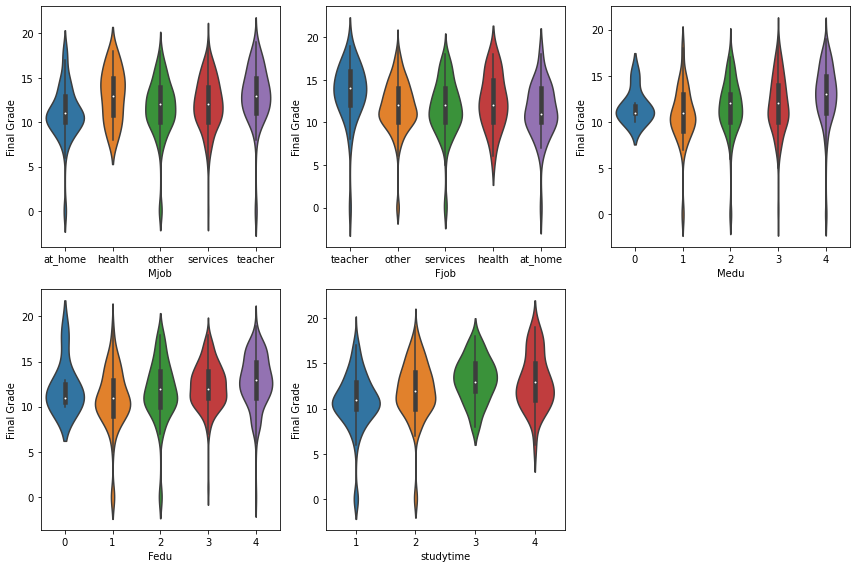

In [17]:
# Select a subset of columns for violin plot
subset_columns = ['Mjob', 'Fjob', 'Medu', 'Fedu', 'studytime']

# Create violin plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(subset_columns):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=data[column], y=data['G3'])
    plt.xlabel(column)
    plt.ylabel('Final Grade')
plt.tight_layout()
plt.show()

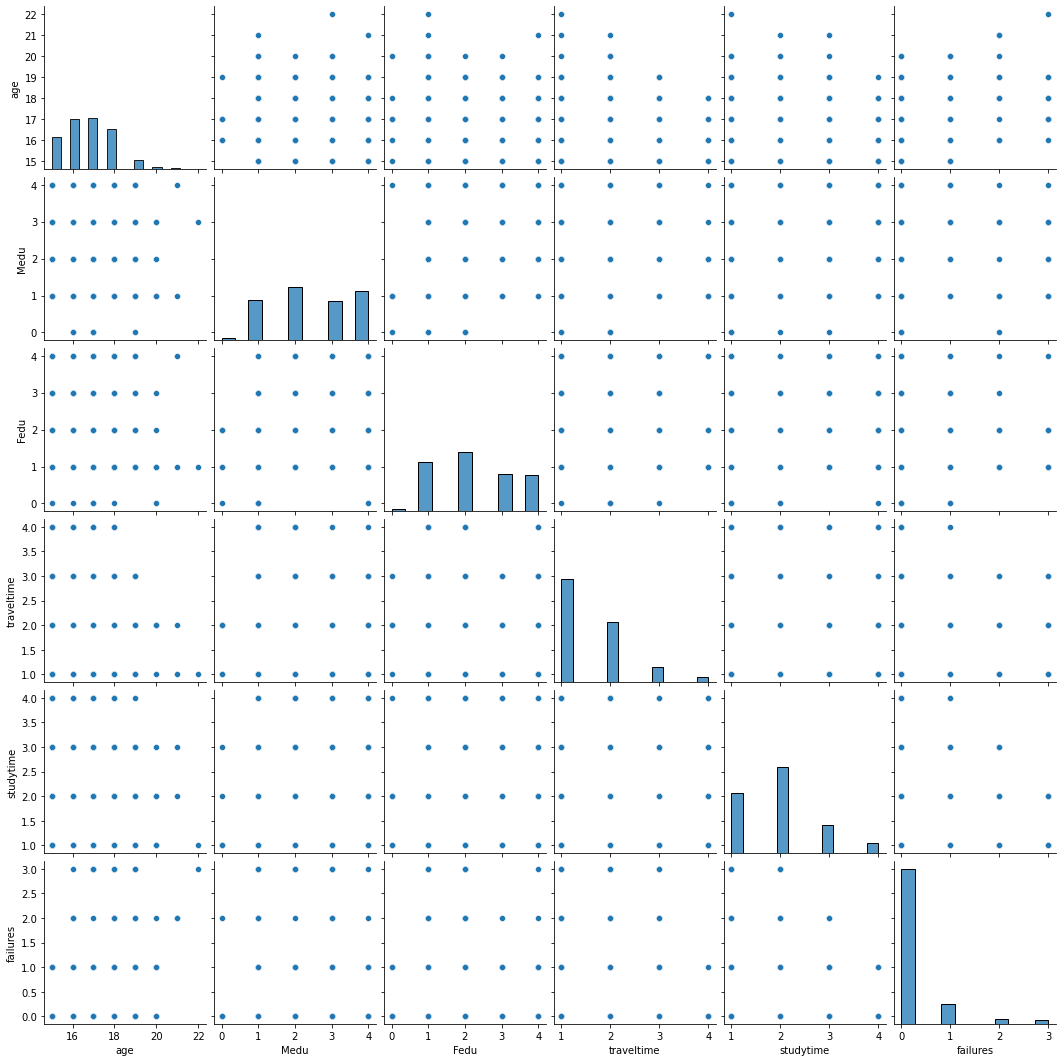

In [18]:
sns.pairplot(data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures']])
plt.show()

# Conclusion

The exploratory data analysis provides a rich, multifaceted view of student performance and its possible determinants. The various visualizations highlight different aspects of the data and illuminate potential relationships among the variables. Some correlations emerge, such as between parents' education levels, internet access, and students' final grades, which can be further investigated through advanced statistical methods.